In [57]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC                            # Import SVM model using guassian
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Model


from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics                            # import metrics modules for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
import joblib

In [58]:
# Read data
PATH = "../../my_data/identification-dataset/my_custom_data/anblock-error-dataset.csv"
df = pd.read_csv(PATH)

# Drop uncomplete rows
df.dropna(inplace=True)

In [59]:
material_names = df.material.unique()
material_names

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

In [60]:
# Set training data
train_df = df.drop('material', axis=1)

# Extracted features 
X = train_df.drop('encoded_material', axis=1)
y = train_df['encoded_material'] # Labels

In [61]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

## SVM

In [62]:
# Create a pipeline object for our model SVM using rbf kernel
pipe_SVM = make_pipeline(StandardScaler(),
                            SVC(kernel='rbf',
                                C=1000, #10**3
                                cache_size=2000,
                                verbose=0)
                        )

In [63]:
pipe_SVM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, cache_size=2000, verbose=0))])

In [64]:
y_pred = pipe_SVM.predict(X_test)

In [65]:
# Evaluate the pipeline and store the results
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
precision_svm = metrics.precision_score(y_test, y_pred, average="macro")
recall_svm = metrics.recall_score(y_test, y_pred, average="macro")
f1_svm = metrics.recall_score(y_test, y_pred, average="macro")

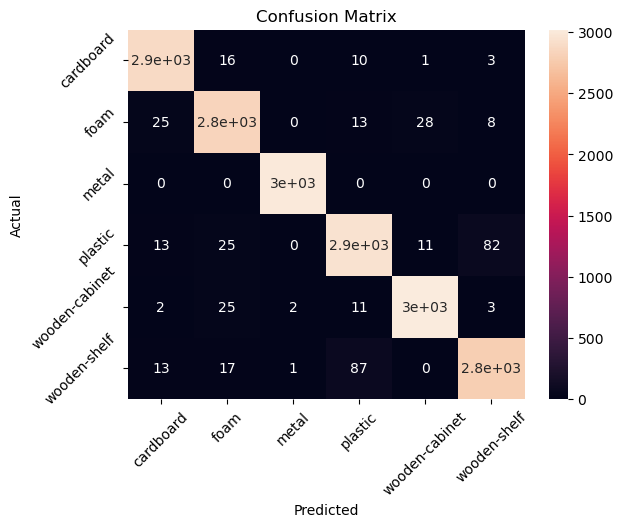

In [66]:
cm_svm = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap_svm = sns.heatmap(cm_svm, annot=True, xticklabels=material_names, yticklabels=material_names)

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap_svm.set_xticklabels(heatmap_svm.get_xticklabels(), rotation=45)
heatmap_svm.set_yticklabels(heatmap_svm.get_yticklabels(), rotation=45)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## MLP

In [67]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                        MLPClassifier(solver='adam',
                                    activation='relu',
                                    
                                    hidden_layer_sizes=(50, 50),
                                    random_state=0,
                                    max_iter=500           # TODO: tune it later
                                    # verbose=True
                                    )
                        )

In [68]:
pipe_MLP.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500,
                               random_state=0))])

In [69]:
y_pred = pipe_MLP.predict(X_test)

In [70]:
# Evaluate the pipeline and store the results
accuracy_mlp = metrics.accuracy_score(y_test, y_pred)
precision_mlp = metrics.precision_score(y_test, y_pred, average="macro")
recall_mlp = metrics.recall_score(y_test, y_pred, average="macro")
f1_mlp = metrics.recall_score(y_test, y_pred, average="macro")

In [71]:
f1_mlp

0.9918791097402065

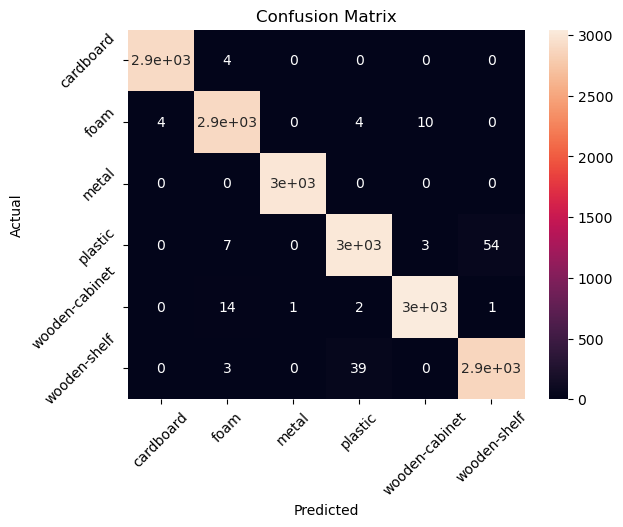

In [72]:
cm_mlp = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap_mlp = sns.heatmap(cm_mlp, annot=True, xticklabels=material_names, yticklabels=material_names)

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap_mlp.set_xticklabels(heatmap_mlp.get_xticklabels(), rotation=45)
heatmap_mlp.set_yticklabels(heatmap_mlp.get_yticklabels(), rotation=45)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## RF

In [73]:
pipe_RF = make_pipeline(StandardScaler(),
        RandomForestClassifier(n_estimators=500,   # no. of decision trees in the forest
                                verbose=0)
        )

In [74]:
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500))])

In [75]:
y_pred = pipe_RF.predict(X_test)

In [76]:
# Evaluate the pipeline and store the results
accuracy_rf = metrics.accuracy_score(y_test, y_pred)
precision_rf = metrics.precision_score(y_test, y_pred, average="macro")
recall_rf = metrics.recall_score(y_test, y_pred, average="macro")
f1_rf = metrics.recall_score(y_test, y_pred, average="macro")

In [77]:
f1_rf

0.9203634469692363

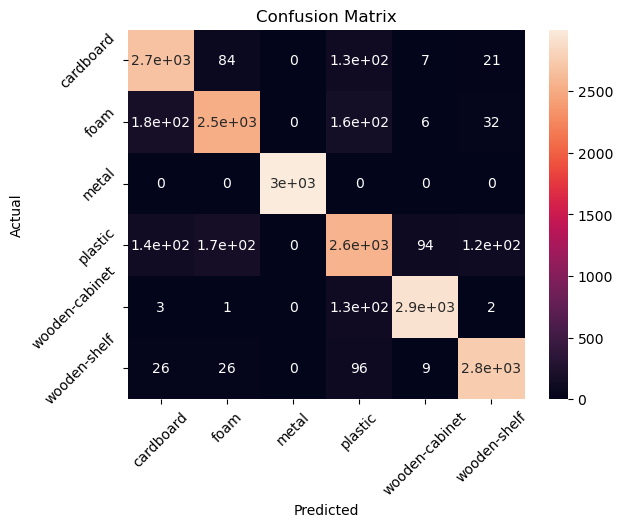

In [78]:
cm_rf = confusion_matrix(y_test, y_pred)
# axis_labels = ['1', 'False']
plt.figure()
heatmap_rf = sns.heatmap(cm_rf, annot=True, xticklabels=material_names, yticklabels=material_names)

# Rotate x-axis and y-axis tick labels at a slight angle
heatmap_rf.set_xticklabels(heatmap_rf.get_xticklabels(), rotation=45)
heatmap_rf.set_yticklabels(heatmap_rf.get_yticklabels(), rotation=45)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()